In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import find_peaks
import numpy as np
import cv2

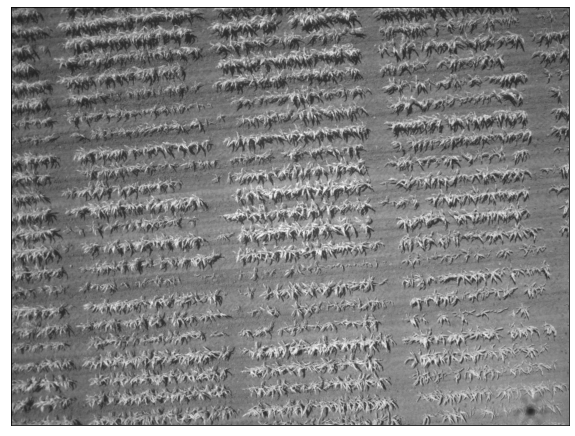

In [ ]:
#img = cv2.imread("IMG_0388_4.tif")
img = cv2.imread("IMG_0506_4.tif")
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

# Rotate image to level the rows

In [ ]:
def level_maize_img(image, angle_range=(-10, 10), angle_steps=20,
                    plot=False):
    '''
    Level the maize image by rotating the image and find the
    rotation angle that has the largest std
    '''
    angles = np.linspace(*angle_range, angle_steps)
    std_vals = []
    
    for angle in angles:
        rotated = rotateImage(image, angle)
        g.append(np.std(avg_with_zeros(rotated, axis=1)))    
    
    if plot:
        plt.plot(g)
        plt.show()

    return angles[np.argmax(g)]

def rotateImage(image, angle: float):
    ''' 
    Take an image and rotate with given angle in degrees.
    The positions without image (left blank because of rotation) are
    filled with 0s.

    Taken from stackoverflow..
    '''
    row,col = image.shape
    center = tuple(np.array([row, col])/2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    new_image = cv2.warpAffine(image, rot_mat, (col, row))
    return new_image

def avg_with_zeros(arr, axis):
    ''' take mean along an axis, but excludes positions with 0'''
    return np.sum(arr, axis=axis)/np.sum(arr != 0, axis=axis)

# Finding Blocks of corns

In [ ]:
def find_blocks(img, axis=0, predicted_block_width=300, height=1, plot=False, rev=True,
                **kwargs):
    if rev:
        vertical_std = -np.std(img, axis=axis)
    else:
        vertical_std = np.std(img, axis=axis)
    normalized_std = normalize(vertical_std)
    
    peaks = find_peaks(normalized_std,
                       distance=predicted_block_width,
                       height=height, **kwargs)[0]
    if axis == 0:
        peaks = [0, *peaks, img.shape[1]-1]
    else:
        peaks = [0, *peaks, img.shape[0]-1]

    if plot:
        plt.figure(figsize=(10,8))
        plt.plot(normalized_std)
        for peak in peaks:
            plt.axvline(peak, ls='dashed', c='r')
        plt.xlabel('pixel', fontsize=30)
        plt.ylabel('Normalized std', fontsize=30)
        plt.xticks(fontsize=30)
        plt.yticks(fontsize=30)
        plt.show()
    
    return peaks

def normalize(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    arr = (arr-mean)/std
    return arr

def get_avg_block_width(anchor_pts):
    return anchor_pts[-2]/(len(anchor_pts)-2)

def add_extra_blocks(anchor_pts):
    avg_block_width = get_avg_block_width(anchor_pts)
    while anchor_pts[-1]-anchor_pts[-2] > avg_block_width:
        anchor_pts.insert(-1, anchor_pts[-2]+avg_block_width)
    return anchor_pts

# Utilities for plotting

In [ ]:
def plot_continous_boxes(img_shape, anchor_pts):
    xys = [(0, pt) for pt in anchor_pts]
    widths = [img_shape[1] for _, _ in enumerate(anchor_pts)]
    heights = [anchor_pts[i+1] - anchor_pts[i] for i in range(len(anchor_pts)-1)]
    plot_boxes(xys, widths, heights)

def plot_boxes(xys, widths, heights):
    for xy, width, height in zip(xys, widths, heights):
        plot_box(xy, width, height)

def plot_box(xy, width, height):
    plt.gca().add_patch(Rectangle(xy, width, height, linewidth=2, edgecolor='r',facecolor='none'))

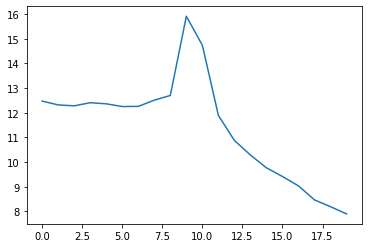

-1.05263157894737


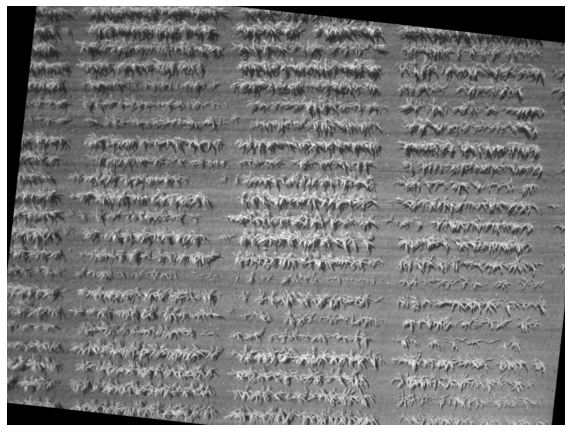

In [ ]:
g = []
ind = level_maize_img(img[:,:,2], angle_range=(-20, 20), angle_steps=20,
              plot=True)
print(ind)
rotated_image = rotateImage(img[:,:,2], ind)
plt.figure(figsize=(10,8))
plt.imshow(rotated_image, cmap='gray')
plt.axis("off")
#plt.title("Rotated image")
plt.show()

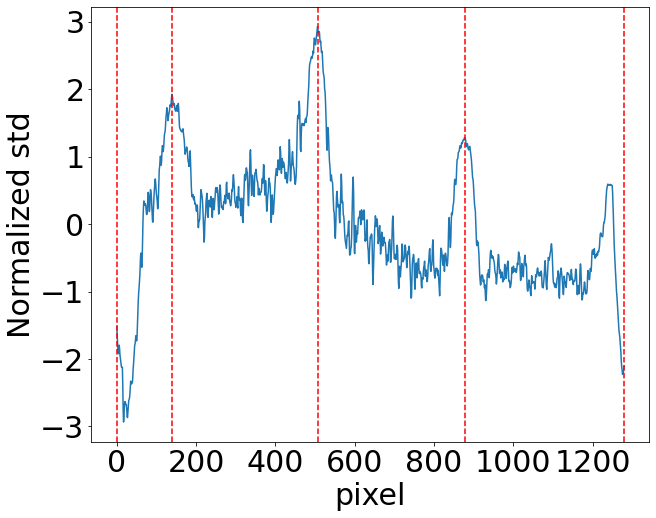

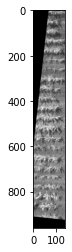

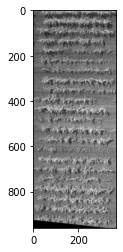

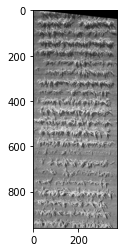

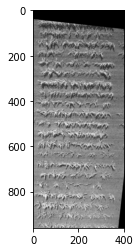

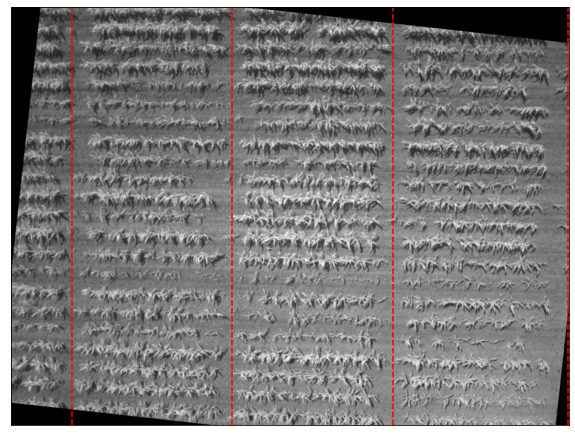

In [ ]:
peaks = find_blocks(rotated_image, plot=True, height=1)
blocks = []
for idx, peak in enumerate(peaks):
    if idx + 1 < len(peaks):
        blocks.append(rotated_image[:,peaks[idx]:peaks[idx+1]])
        plt.imshow(rotated_image[:,peaks[idx]:peaks[idx+1]], cmap='gray')
        plt.show()

plt.figure(figsize=(10,8))
plt.imshow(rotated_image, cmap='gray')
for peak in peaks:
    plt.axvline(peak, ls='dashed', c='r')

plt.xticks([],[])
plt.yticks([],[])
plt.show()
  


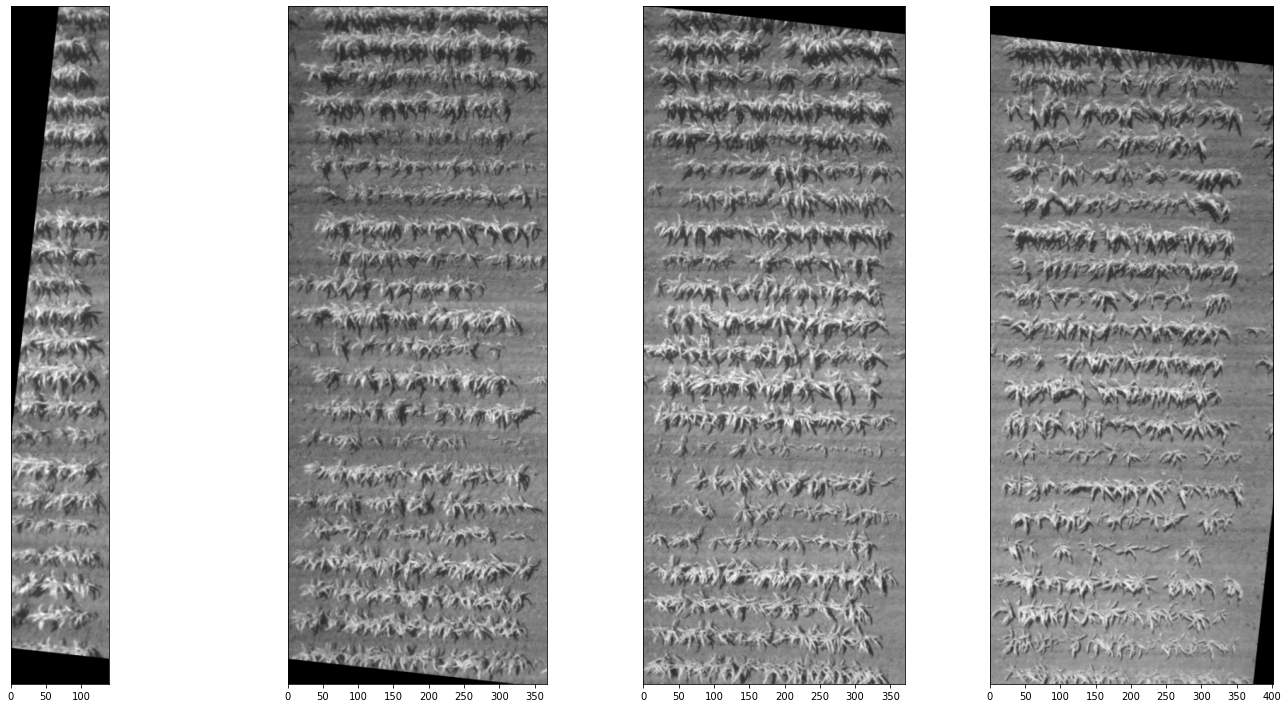

In [ ]:
fig, axes = plt.subplots(1, len(blocks), figsize=(20,10))
fig.tight_layout() 
for i in range(len(blocks)):
  ax = axes[i]
  ax.imshow(blocks[i], cmap="gray")
  ax.set(xlim=(0, blocks[i].shape[1]))
  ax.get_yaxis().set_visible(False)

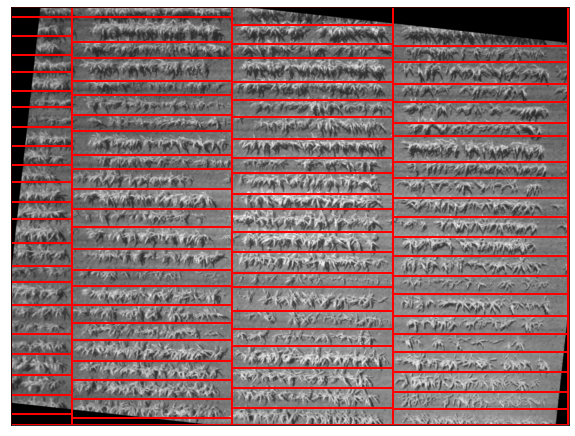

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(rotated_image, cmap='gray')
plt.xticks([],[])
plt.yticks([],[])

x_pos = 0
for idx, block in enumerate(blocks):
      peaks = find_blocks(block, predicted_block_width=30, axis=1, height=-2, plot=False, rev=True,
                          prominence=0.3)
      add_extra_blocks(peaks)
      
      xys = [(x_pos, pt) for pt in peaks]
      widths = [block.shape[1] for _, _ in enumerate(peaks)]
      heights = [peaks[i+1] - peaks[i] for i in range(len(peaks)-1)]
      plot_boxes(xys, widths, heights)
      x_pos += block.shape[1]
plt.show()
      

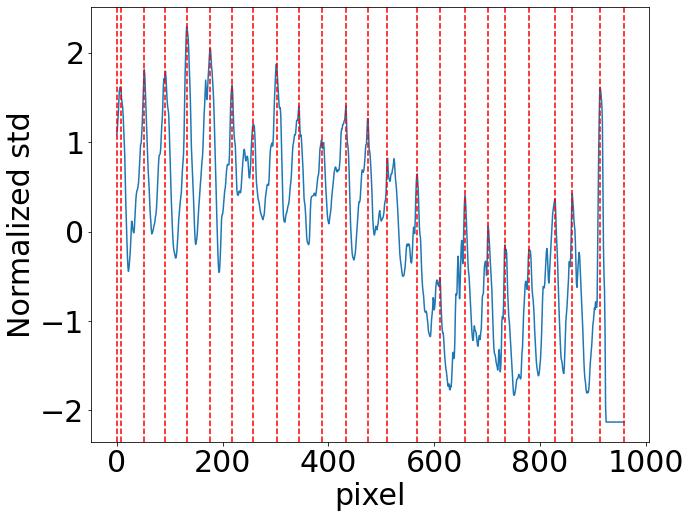

[0, 7, 52, 92, 132, 177, 218, 258, 302, 344, 387, 433, 475, 511, 568, 611, 658, 702, 734, 779, 828, 861, 914, 955.5454545454545, 959]


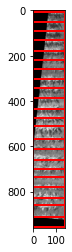

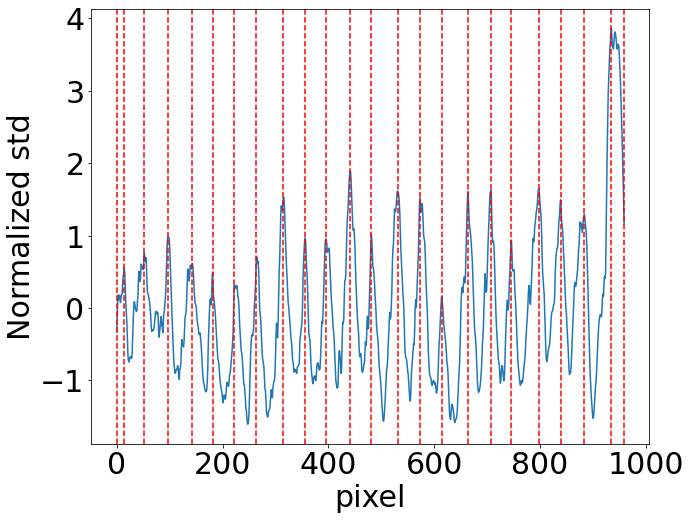

[0, 14, 52, 96, 143, 181, 222, 264, 315, 356, 395, 441, 481, 531, 573, 614, 664, 707, 746, 798, 839, 884, 935, 959]


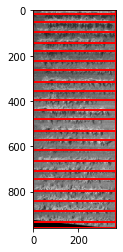

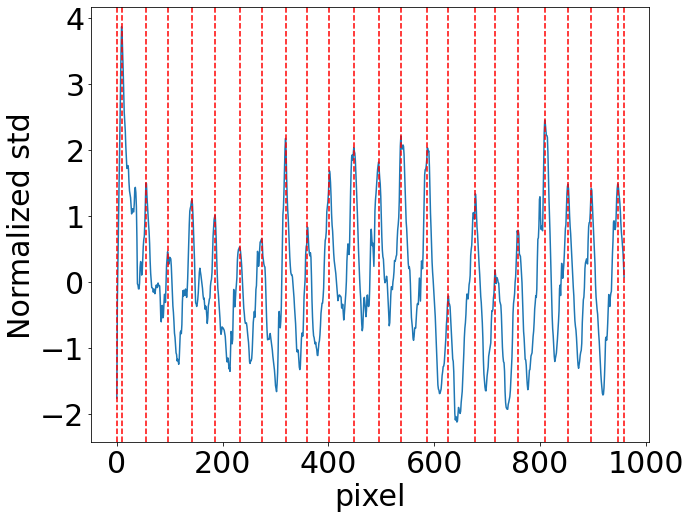

[0, 9, 55, 96, 142, 186, 232, 274, 319, 360, 402, 448, 495, 537, 587, 627, 678, 715, 759, 809, 853, 897, 947, 959]


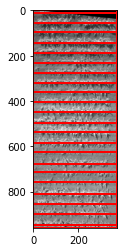

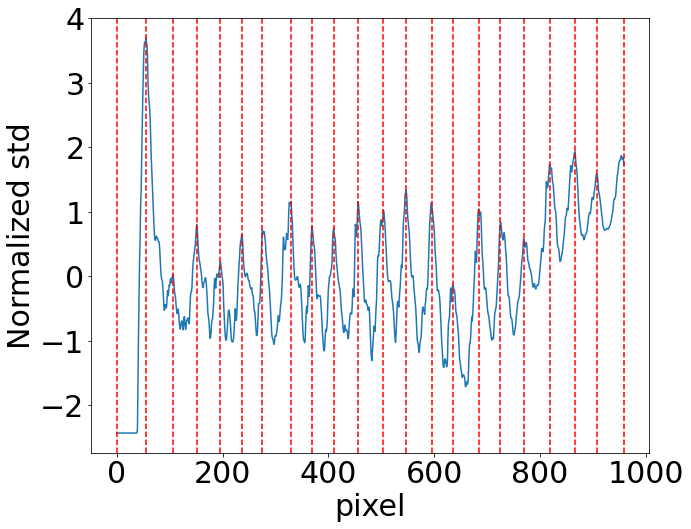

[0, 55, 106, 151, 196, 236, 275, 329, 369, 410, 456, 504, 547, 595, 635, 684, 725, 769, 818, 866, 907, 952.35, 959]


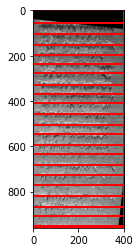

In [ ]:
for idx, block in enumerate(blocks):
      peaks = find_blocks(block, predicted_block_width=30, axis=1, height=-2, plot=True, rev=False,
                          prominence=0.3)
      plt.imshow(block, cmap='gray')
      add_extra_blocks(peaks)
      print(peaks)
      plot_continous_boxes(block.shape, peaks)
      plt.show()


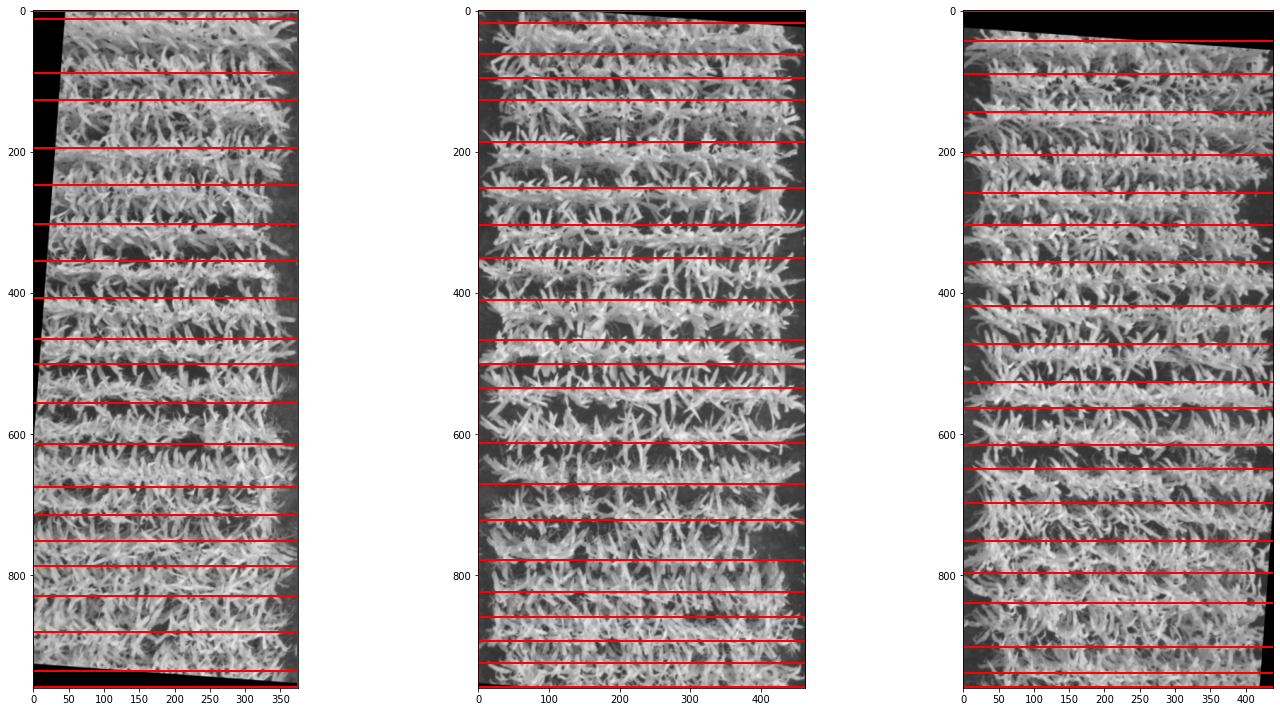

In [ ]:
fig, axes = plt.subplots(1, len(blocks), figsize=(20,10))
fig.tight_layout() 
for idx, block in enumerate(blocks):
      peaks = find_blocks(block, predicted_block_width=30, axis=1, height=-2, plot=False, rev=False,
                          prominence=0.3)
      axes[idx].imshow(block, cmap="gray")
      add_extra_blocks(peaks)
      xys = [(0, pt) for pt in peaks]
      widths = [block.shape[1] for _, _ in enumerate(peaks)]
      heights = [peaks[i+1] - peaks[i] for i in range(len(peaks)-1)]
      for xy, width, height in zip(xys, widths, heights):
        axes[idx].add_patch(Rectangle(xy, width, height, linewidth=2, edgecolor='r',facecolor='none'))

In [ ]:
def find_blocks(img):
  height, width = img.shape
  # Compute the sum of pixels along the vertical direction
  column_sum = np.sum(img, axis=0)
  max_sum, min_sum = column_sum.max(), column_sum.min()
  threshold = (max_sum + min_sum)/2
  # Threshold the pixel sums to find the gaps between crops
  # Assume that gaps are darker
  gap_pos = (column_sum<=threshold).astype(int)
  gap_grad = np.gradient(gap_pos)
  # Find the edges of the gaps
  gap_idx = np.where(np.abs(gap_grad)>0)[0]
  if gap_pos[0]:
    gap_idx = gap_idx[2:]
  if gap_pos[width-1]:
    gap_idx = gap_idx[:-2]
  left_edges = list(gap_idx[::4])
  right_edges = list(gap_idx[2:][::4])
  left_edges.insert(0, 0)
  right_edges.append(width-1)
  # Generate boxes by the left and right edges of gaps
  boxes = [[left_edges[i], right_edges[i]] for i in range(len(left_edges))]
  return np.array(boxes)

def slice_img(img, bounds):
  left, right = bounds 
  return img[:, left:right+1]
  

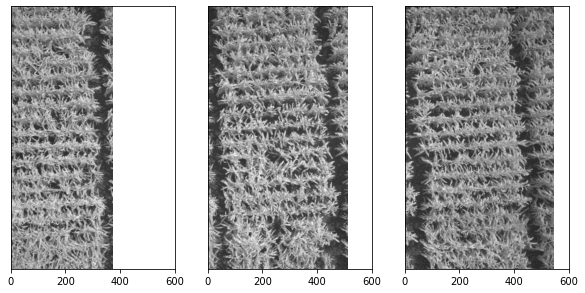

In [ ]:
block_idx = find_blocks(img[:,:,0])
num = len(block_idx)
fig, axes = plt.subplots(1, num, figsize=(10,5))
for i in range(num):
  subimg = slice_img(img, block_idx[i])
  ax = axes[i]
  ax.imshow(subimg)
  ax.set(xlim=(0, 600))
  ax.get_yaxis().set_visible(False)

Alignment

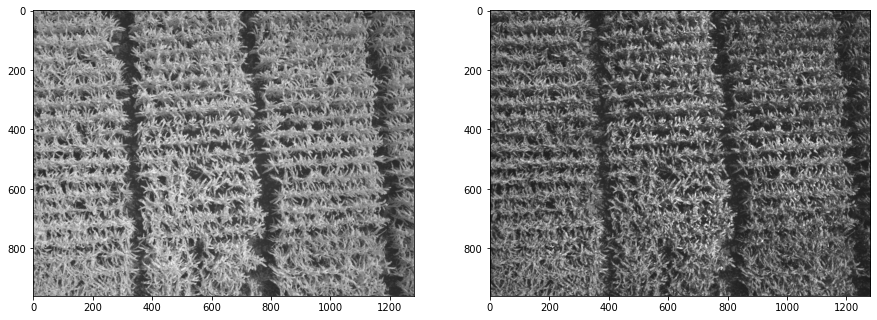

In [ ]:
# Loading image of another channel for alignment test
img_channel4 = cv2.imread("IMG_0200_4.tif")
img_channel5 = cv2.imread("IMG_0200_5.tif")
def show_imgs(img1, img2):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
  ax1.imshow(img1)
  ax2.imshow(img2)
show_imgs(img_channel4, img_channel5)

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 1.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints4, descriptors4 = sift.detectAndCompute(img_channel4, None)
keypoints5, descriptors5 = sift.detectAndCompute(img_channel5, None)
# feature_img_c4 = cv2.drawKeypoints(img_channel4, feature_points_c4, img_channel4.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# feature_img_c5 = cv2.drawKeypoints(img_channel5, feature_points_c5, img_channel5.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#show_imgs(feature_img_c4, feature_img_c5)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors4, descriptors5)
matches = sorted(matches, key = lambda x:x.distance)
match_img = cv2.drawMatches(img_channel4, keypoints4, img_channel5, keypoints5, matches[:50], img_channel4.copy(), flags=2)

NameError: ignored

(-0.5, 2559.5, 959.5, -0.5)

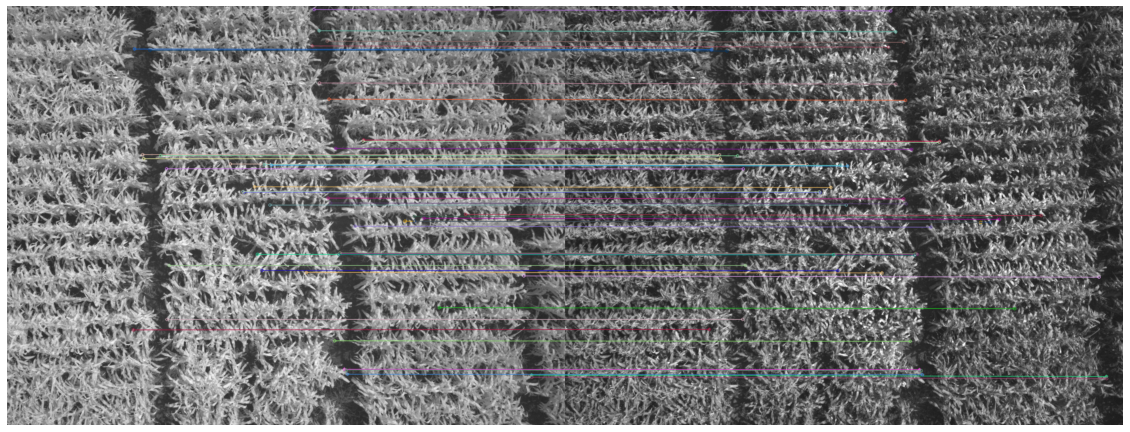

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(match_img)
plt.axis("off")

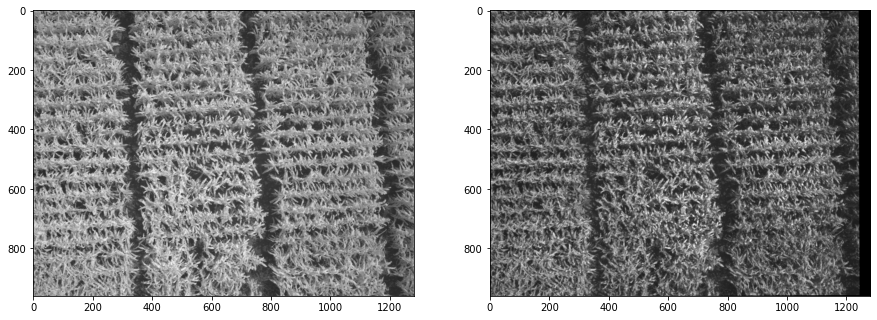

In [ ]:
#-- Localize the object
good_matches = matches[:50]
good_kps4 = np.empty((len(good_matches),2), dtype=np.float32)
good_kps5 = np.empty((len(good_matches),2), dtype=np.float32)
for i in range(len(good_matches)):
    #-- Get the keypoints from the good matches
    good_kps4[i,0] = keypoints4[good_matches[i].queryIdx].pt[0]
    good_kps4[i,1] = keypoints4[good_matches[i].queryIdx].pt[1]
    good_kps5[i,0] = keypoints5[good_matches[i].trainIdx].pt[0]
    good_kps5[i,1] = keypoints5[good_matches[i].trainIdx].pt[1]
h, status = cv2.findHomography(good_kps5, good_kps4, cv2.RANSAC)

'''
The calculated homography can be used to warp
the source image to destination. Size is the
size (width,height) of im_dst
'''

img_channel5_transformed = cv2.warpPerspective(img_channel5, h, (img_channel5.shape[1], img_channel5.shape[0]))
show_imgs(img_channel4, img_channel5_transformed)

In [ ]:
def align_imgs(src_img, dst_img, feature_detector, feature_matcher, max_matches=50):
    kp_src, ds_src = feature_detector.detectAndCompute(src_img, None)
    kp_dst, ds_dst = feature_detector.detectAndCompute(dst_img, None)
    matches = feature_matcher.match(ds_src, ds_dst)
    matches = sorted(matches, key = lambda x:x.distance)
    good_matches = matches[:max_matches]
    good_kp_src = np.empty((len(good_matches),2), dtype=np.float32)
    good_kp_dst = np.empty((len(good_matches),2), dtype=np.float32)
    for i in range(len(good_matches)):
        #-- Get the keypoints from the good matches
        good_kp_src[i,0] = kp_src[good_matches[i].queryIdx].pt[0]
        good_kp_src[i,1] = kp_src[good_matches[i].queryIdx].pt[1]
        good_kp_dst[i,0] = kp_dst[good_matches[i].trainIdx].pt[0]
        good_kp_dst[i,1] = kp_dst[good_matches[i].trainIdx].pt[1]
    h, status = cv2.findHomography(good_kp_src, good_kp_dst, cv2.RANSAC)
    transformed = cv2.warpPerspective(src_img, h, (src_img.shape[1], src_img.shape[0]))
    return transformed

In [ ]:
img_b = cv2.imread("IMG_0200_1.tif")
img_g = cv2.imread("IMG_0200_2.tif")
img_r = cv2.imread("IMG_0200_3.tif")
img_re = cv2.imread("IMG_0200_4.tif")
img_nir = cv2.imread("IMG_0200_5.tif")


In [ ]:
img_g_transformed = align_imgs(img_g, img_r, sift, bf)
img_b_transformed = align_imgs(img_b, img_r, sift, bf)

In [ ]:
img_rgb = np.zeros_like(img_r)
img_rgb[:,:,0] = img_r[:,:,0]
img_rgb[:,:,1] = img_g_transformed[:,:,0]
img_rgb[:,:,2] = img_b_transformed[:,:,0]
plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.axis("off")

Text(0.5, 1.0, 'Near Infrared')

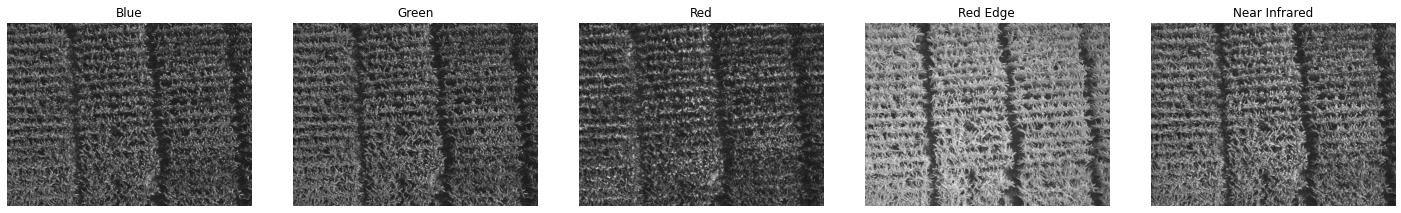

In [ ]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5, figsize=(20,8))
fig.tight_layout() 
ax0.imshow(img_b)
ax0.set_axis_off()
ax0.set_title("Blue")
ax1.imshow(img_g)
ax1.set_axis_off()
ax1.set_title("Green")
ax2.imshow(img_r)
ax2.set_axis_off()
ax2.set_title("Red")
ax3.imshow(img_re)
ax3.set_axis_off()
ax3.set_title("Red Edge")
ax4.imshow(img_nir)
ax4.set_axis_off()
ax4.set_title("Near Infrared")
